In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime
import warnings
import time
from scipy import stats
from sklearn import linear_model
import itertools
import calendar
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.preprocessing import scale
import pickle as pk

# Load Dataset

Create pandas dataframe to curate starting times and add the run data. Runs on one user only, using a randomly selected .csv from January 2018. **As a consulting project, any User IDs have been changed**.

In [2]:
# Load two separate datasets
data_sample = pd.read_csv('20180120-235959-DataSample.csv',dtype={"value": float})
run = pd.read_csv('20180120-235959-DataWorkoutRun.csv',dtype={"value": float})

# Quick view of data
data_sample.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,timezone,mood,tags
0,6ca16c0c-0086-536b-82e2-cfb6ec87f480,00000000-5851-ee08-eb34-e20acc5af74e,healthkit:com.misfitwearables.Prometheus,0AFF5838-6F31-4B3C-962B-ED91653E2639,Misfit,health-step-count,2018-01-20 22:34:05+00,2018-01-20 23:35:04+00,154.0,NaN,NaN,2018-01-20 23:55:05.588+00,2018-01-20 23:55:05.588+00,America/Los_Angeles,NaN,NaN
1,6b43b62c-36ef-554e-974e-1ee3aef28c41,00000000-5851-ee08-eb34-e20acc5af74e,healthkit:com.misfitwearables.Prometheus,F9C17422-C451-413F-A1AF-F8879E86422D,Misfit,health-step-count,2018-01-20 21:33:05+00,2018-01-20 22:34:04+00,398.0,NaN,NaN,2018-01-20 23:55:05.588+00,2018-01-20 23:55:05.588+00,America/Los_Angeles,NaN,NaN
2,85100265-36aa-59ee-8a3e-5eb39577037c,00000000-5851-ee08-eb34-e20acc5af74e,healthkit:com.apple.health.88795572-5859-4B64-...,14AF68EB-06EB-4359-B1E7-93B42E813E72,iPhone,health-step-count,2018-01-20 23:18:25.729+00,2018-01-20 23:24:58.88+00,16.0,NaN,NaN,2018-01-20 23:55:05.588+00,2018-01-20 23:55:05.588+00,America/Los_Angeles,NaN,NaN
3,3abe6f0a-05d4-5ef8-b853-67e56cabd0f5,00000000-5851-ee08-eb34-e20acc5af74e,healthkit:com.misfitwearables.Prometheus,37E188F7-DF59-4FE5-A3D6-F2F449F6936A,Misfit,health-step-count,2018-01-20 23:35:05+00,2018-01-20 23:43:04+00,124.0,NaN,NaN,2018-01-20 23:55:05.586+00,2018-01-20 23:55:05.586+00,America/Los_Angeles,NaN,NaN
4,fdf61142-fbc0-5310-83b4-2a1d5a5497b0,00000000-5851-ee08-eb34-e20acc5af74e,healthkit:com.ua.record,DBF2F705-865E-4517-AB5D-BCCA173C4AE8,Record,health-sleep,2018-01-20 09:01:26.337+00,2018-01-20 15:10:15.353+00,0.0,NaN,NaN,2018-01-20 23:55:05.582+00,2018-01-20 23:55:05.582+00,America/Los_Angeles,NaN,NaN


In [3]:
# Duplicate user - replace owner name
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)

#Focus on one user
u = data_sample["owner"].str.contains('00000000-56ff-538b-2223-e1800b5e3ddb')
data_sample = data_sample[u]
data_sample.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,timezone,mood,tags
39,bd4ea384-44df-55e2-a540-ab974ff9497c,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.ED743E41-5AB8-4C97-...,421AFEAA-5EF2-4640-ABDD-79F5C33E3C09,MUJTABA’s Apple Watch,health-heart-rate,2018-01-20 22:15:55.231+00,2018-01-20 22:15:55.231+00,76.0,NaN,NaN,2018-01-20 22:25:39.182+00,2018-01-20 22:25:39.182+00,America/Los_Angeles,NaN,NaN
40,a7465b4b-89c1-5c12-83ba-aa9a29a2ff5a,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.ED743E41-5AB8-4C97-...,87979F60-B611-48DE-A567-D6937B3D5B3F,MUJTABA’s Apple Watch,health-heart-rate,2018-01-20 21:52:23.731+00,2018-01-20 21:52:23.731+00,71.0,NaN,NaN,2018-01-20 22:24:36.491+00,2018-01-20 22:24:36.491+00,America/Los_Angeles,NaN,NaN
41,c9e0c7d0-21c9-5457-b7f7-6153618edac2,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.ED743E41-5AB8-4C97-...,697643E5-6921-422A-9B7E-7DECC25BA0FC,MUJTABA’s Apple Watch,health-heart-rate,2018-01-20 21:59:15.842+00,2018-01-20 21:59:15.842+00,82.0,NaN,NaN,2018-01-20 22:24:36.489+00,2018-01-20 22:24:36.489+00,America/Los_Angeles,NaN,NaN
42,a1c5bfb1-645b-561f-8c9b-dcfcbc7474c8,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.ED743E41-5AB8-4C97-...,034E3B65-FD7A-49C6-9139-3BEF01CE6B6A,MUJTABA’s Apple Watch,health-heart-rate,2018-01-20 22:01:06.484+00,2018-01-20 22:01:06.484+00,82.0,NaN,NaN,2018-01-20 22:24:36.468+00,2018-01-20 22:24:36.468+00,America/Los_Angeles,NaN,NaN
43,a27b62e2-6b0b-5b9a-90e5-6bc495df08af,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.CAD564E9-53CC-4C8F-...,7A3E02FF-4F80-4DB2-9FA5-B4B4599D634A,Rostom 2,health-step-count,2018-01-20 22:12:13.135+00,2018-01-20 22:18:15.702+00,18.0,NaN,NaN,2018-01-20 22:24:36.467+00,2018-01-20 22:24:36.467+00,America/Los_Angeles,NaN,NaN


All metric types are contained in column "type" and need to be expanded upon; "value" contains the actual data - of note: data is in blocks of time.

In [4]:
# Ensure datetime from start and end times of activity

data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['endDate'] = pd.to_datetime(data_sample['endDate'])
data_sample.index = data_sample['startDate']

run['startDate'] = pd.to_datetime(run['startDate']) 
run['createdAt'] = pd.to_datetime(run['createdAt']) 
run.index = run['createdAt']

Create column for duration of each activity and day of week

In [5]:
# Duration calculation
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)

# Day of week
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.sort_index(inplace=True)
data_sample.head(1)

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,timezone,mood,tags,duration,day_of_week
startDate,,,,,,,,,,,,,,,,,,
2012-01-19 07:49:00,c9f629e1-b610-4983-9732-5300e00c752f,00000000-56ff-538b-2223-e1800b5e3ddb,fitbit,6011012:1,Fitbit,health-sleep,2012-01-19 07:49:00,2012-01-19 07:51:00,0.0,NaN,NaN,2017-10-11 23:00:34.006938+00,2017-10-12 23:51:22.417222+00,America/Los_Angeles,NaN,NaN,00:02:00,3


#### Data types?

In [6]:
data_sample.dtypes

_id                      object
owner                    object
source                   object
sourceId                 object
sourceName               object
type                     object
startDate        datetime64[ns]
endDate          datetime64[ns]
value                   float64
content                  object
originalData             object
createdAt                object
updatedAt                object
timezone                 object
mood                     object
tags                     object
duration        timedelta64[ns]
day_of_week               int64
dtype: object

Will need to convert some data

## Convert from SI Units

time (seconds to minutes) , distance (meters to miles), weight (kg to lbs)

In [7]:
def converttime(secs):
    minutes = secs / 60
    return minutes
    
    #mins, secs = divmod(secs, 60)
    #hours, mins = divmod(mins, 60)
    #return '%02d:%02d:%02d' % (hours, mins, secs)

def convertdistance(meters):
    miles = meters / 1609.344
    return miles

def convertweight(weight):
    lbs = weight * 2.20462262185
    return lbs

#run['runDuration'] = run['runDuration'].apply(converttime)
#run['runDistance'] = run['runDistance'].apply(convertdistance)
run['time_hour'] = run.startDate.apply(lambda x: x.hour)

In [8]:
run.head()

,_id,type,owner,source,sourceId,sourceName,session,sessionElement,track,sessionTitle,...,runDuration,runDistance,locations,originalData,createdAt,updatedAt,timezone,mood,tags,time_hour
createdAt,,,,,,,,,,,,,,,,,,,,,
2018-01-20 17:17:25.932,935fb0e0-58b9-43bc-85b3-bddff3580b44,og.indoor,00000000-5851-ee08-eb34-e20acc5af74e,ongo,NaN,Ongo,00000000-58af-b33d-00f7-511ee8908bd9,00000000-58af-b37a-00f7-511ee8908bda,NaN,Run,...,1883.000000,4988.966240,[],NaN,2018-01-20 17:17:25.932,2018-01-20 17:17:25.932+00,America/Los_Angeles,NaN,NaN,17.0
2018-01-18 21:51:30.651,b0eb0255-153c-49cf-9588-49f14db35fbf,og.outdoor,00000000-5851-ee08-eb34-e20acc5af74e,ongo,NaN,Ongo,00000000-586d-d8f0-98dd-ba187685b318,00000000-586d-d8f0-98dd-ba187685b31c,NaN,Day 22: Long Day,...,5.872608,0.000000,[],NaN,2018-01-18 21:51:30.651,2018-01-18 21:51:30.651+00,America/Los_Angeles,NaN,NaN,21.0
2018-01-18 02:05:45.474,feb71669-baa3-4f10-8a4a-5eee4615b5b4,og.outdoor,00000000-5851-ee08-eb34-e20acc5af74e,ongo,NaN,Ongo,00000000-586d-d8f0-98dd-ba187685b318,00000000-586d-d8f0-98dd-ba187685b31c,NaN,Day 22: Long Day,...,5.458321,0.000000,[],NaN,2018-01-18 02:05:45.474,2018-01-18 02:05:45.474+00,America/Los_Angeles,NaN,NaN,2.0
2018-01-17 01:21:22.527,81154a3f-15d5-45c4-82d7-970312767d87,og.outdoor,00000000-5851-ee08-eb34-e20acc5af74e,ongo,NaN,Ongo,00000000-586d-d8f0-98dd-ba187685b318,00000000-586d-d8f0-98dd-ba187685b31c,NaN,Day 22: Long Day,...,6.901578,0.000000,[],NaN,2018-01-17 01:21:22.527,2018-01-17 01:21:22.527+00,America/Los_Angeles,NaN,NaN,1.0
2018-01-13 19:00:33.217,855ddd76-2606-4760-9818-7ec8bde2b0eb,og.indoor,00000000-56ff-538b-2223-e1800b5e3ddb,ongo,NaN,Ongo,00000000-58af-b33d-00f7-511ee8908bd9,00000000-58af-b37a-00f7-511ee8908bda,NaN,Run,...,1036.000000,3234.781336,[],NaN,2018-01-13 19:00:33.217,2018-01-13 19:00:33.217+00,America/Los_Angeles,NaN,NaN,19.0


### Add the run data into existing data frame. Run Distance = value, duration of the run is under runDuration column

In [9]:
# Create new df to match data_sample

def run_df(df):
    data_run = pd.DataFrame(columns = ['_id','owner','source','sourceId','sourceName','type','startDate','endDate','value','content','originalData','createdAt','updatedAt','timezone','mood','tags','duration','day_of_week'])
    data_run['_id'] = df['_id']
    data_run['owner'] = df['owner']
    data_run['source'] = df['source']
    data_run['sourceId'] = df['sourceId']
    data_run['sourceName'] = df['sourceName']
    data_run['type'] = 'run'
    data_run['startDate'] = df['createdAt'] 
    data_run['value'] = df['runDistance'] 
    data_run['timezone'] = df['timezone']
    data_run['createdAt'] = df['createdAt'] 
    data_run['updatedAt'] = df['updatedAt']
    data_run['duration'] = df['runDuration']
    return data_run

data_run = run_df(run)
data_run.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,timezone,mood,tags,duration,day_of_week
createdAt,,,,,,,,,,,,,,,,,,
2018-01-20 17:17:25.932,935fb0e0-58b9-43bc-85b3-bddff3580b44,00000000-5851-ee08-eb34-e20acc5af74e,ongo,NaN,Ongo,run,2018-01-20 17:17:25.932,NaN,4988.966240,NaN,NaN,2018-01-20 17:17:25.932,2018-01-20 17:17:25.932+00,America/Los_Angeles,NaN,NaN,1883.000000,NaN
2018-01-18 21:51:30.651,b0eb0255-153c-49cf-9588-49f14db35fbf,00000000-5851-ee08-eb34-e20acc5af74e,ongo,NaN,Ongo,run,2018-01-18 21:51:30.651,NaN,0.000000,NaN,NaN,2018-01-18 21:51:30.651,2018-01-18 21:51:30.651+00,America/Los_Angeles,NaN,NaN,5.872608,NaN
2018-01-18 02:05:45.474,feb71669-baa3-4f10-8a4a-5eee4615b5b4,00000000-5851-ee08-eb34-e20acc5af74e,ongo,NaN,Ongo,run,2018-01-18 02:05:45.474,NaN,0.000000,NaN,NaN,2018-01-18 02:05:45.474,2018-01-18 02:05:45.474+00,America/Los_Angeles,NaN,NaN,5.458321,NaN
2018-01-17 01:21:22.527,81154a3f-15d5-45c4-82d7-970312767d87,00000000-5851-ee08-eb34-e20acc5af74e,ongo,NaN,Ongo,run,2018-01-17 01:21:22.527,NaN,0.000000,NaN,NaN,2018-01-17 01:21:22.527,2018-01-17 01:21:22.527+00,America/Los_Angeles,NaN,NaN,6.901578,NaN
2018-01-13 19:00:33.217,855ddd76-2606-4760-9818-7ec8bde2b0eb,00000000-56ff-538b-2223-e1800b5e3ddb,ongo,NaN,Ongo,run,2018-01-13 19:00:33.217,NaN,3234.781336,NaN,NaN,2018-01-13 19:00:33.217,2018-01-13 19:00:33.217+00,America/Los_Angeles,NaN,NaN,1036.000000,NaN


In [10]:
# Append dataframes

data_sample = data_sample.append([data_run])
data_sample.sort_index(inplace=True)

In [11]:
# Full datetime unnecessary for purpose of this project - limit date to just the day without the time for the index

data_sample['date_minus_time'] = data_sample["startDate"].apply( lambda data_sample : datetime.datetime(year=data_sample.year, month=data_sample.month, day=data_sample.day))	
data_sample.set_index(data_sample["date_minus_time"],inplace=True)
data_sample.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,timezone,mood,tags,duration,day_of_week,date_minus_time
date_minus_time,,,,,,,,,,,,,,,,,,,
2012-01-19,c9f629e1-b610-4983-9732-5300e00c752f,00000000-56ff-538b-2223-e1800b5e3ddb,fitbit,6011012:1,Fitbit,health-sleep,2012-01-19 07:49:00,2012-01-19 07:51:00,0.0,NaN,NaN,2017-10-11 23:00:34.006938+00,2017-10-12 23:51:22.417222+00,America/Los_Angeles,NaN,NaN,0 days 00:02:00,3,2012-01-19
2012-01-19,74e98e1d-0c50-4e3c-b9f2-9feb8f0c42d9,00000000-56ff-538b-2223-e1800b5e3ddb,fitbit,6011012:2,Fitbit,health-sleep,2012-01-19 07:51:00,2012-01-19 09:23:00,1.0,NaN,NaN,2017-10-11 23:00:34.006938+00,2017-10-12 23:51:22.417222+00,America/Los_Angeles,NaN,NaN,0 days 01:32:00,3,2012-01-19
2012-01-19,6f265801-b8b6-5e9c-9a25-03681d368d26,00000000-56ff-538b-2223-e1800b5e3ddb,ongo,daily-summary:health-sleep:2012-01-19,Fitbit,daily-summary:health-sleep,2012-01-19 08:00:00,2012-01-20 07:59:59,24120.0,"{""raw_intervals"": [[-660.0, -540.0, 0.0], [-54...",NaN,2017-11-01 00:16:58.628111+00,2017-11-01 23:41:18.403234+00,America/Los_Angeles,NaN,NaN,0 days 23:59:59,3,2012-01-19
2012-01-19,67505381-9abf-430b-a18f-d06feecb7a42,00000000-56ff-538b-2223-e1800b5e3ddb,fitbit,6011012:3,Fitbit,health-sleep,2012-01-19 09:23:00,2012-01-19 09:25:00,0.0,NaN,NaN,2017-10-11 23:00:34.006938+00,2017-10-12 23:51:22.417222+00,America/Los_Angeles,NaN,NaN,0 days 00:02:00,3,2012-01-19
2012-01-19,630db760-e723-485e-acaa-122bfa62a6f3,00000000-56ff-538b-2223-e1800b5e3ddb,fitbit,6011012:4,Fitbit,health-sleep,2012-01-19 09:25:00,2012-01-19 09:26:00,1.0,NaN,NaN,2017-10-11 23:00:34.006938+00,2017-10-12 23:51:22.417222+00,America/Los_Angeles,NaN,NaN,0 days 00:01:00,3,2012-01-19


### Separate out and aggregate metrics, perform conversions

In [12]:
## Create function to aggregate data (sum) and find the mean of metric per day. Used for steps, sleep
# Inputs: df = dataframe
#         category = type of metric as labeled in df (ie sleep, steps, etc.)
#         value_category = column used for analysis (either 'value' from df or 'duration' as calculated)
#         action = aggregation function (sum, mean)
#         name = rename the column

def agg_data(df,category,value_category,action,name):
    df2 = df.loc[df['type'] == category]
    
    if (category == 'health-sleep'):
        # 1 indicates logged sleep (0 = awake). Need to see accumulated hours of binary option 1
        df2 = df2.loc[df2['value'] == 1.0]
    
    df2 = df2.groupby('date_minus_time').agg({value_category: action})
    
    if (category == 'health-sleep'):
        df2[value_category] = (df2[value_category] / pd.Timedelta(hours=1));

    df2 = df2.resample('D').mean()
    df2.rename(index=str, columns={value_category: name}, inplace=True)
    
    return df2

Run aggregation function for each metric

In [13]:
steps = agg_data(data_sample,'daily-summary:health-step-count','value','sum','Steps')

sleep = agg_data(data_sample,'health-sleep','duration','sum','Sleep')

avg_weight = agg_data(data_sample,'health-weight','value','mean','Weight')
avg_weight['Weight'] = avg_weight['Weight'].apply(convertweight)

avg_hr = agg_data(data_sample,'health-heart-rate','value','mean','Avg Heart Rate')

avg_bf = agg_data(data_sample,'health-body-fat','value','mean','Body Fat')

avg_bmi = agg_data(data_sample,'health-bmi','value','mean','BMI')

run_distance = agg_data(data_sample,'run','value','sum','Run Distance')

run_duration = agg_data(data_sample,'run','duration','sum','Run Duration')

In [14]:
# Example
steps.head()

,Steps
date_minus_time,
2016-05-30 00:00:00,2800.0
2016-05-31 00:00:00,4946.0
2016-06-01 00:00:00,11357.0
2016-06-02 00:00:00,3370.0
2016-06-03 00:00:00,21404.0


# Final Prep of clean data

## Isolate data from last four months (this can be changed as the app builds)
### Impute where logical (i.e. weight will not change much if a value is missing)

In [15]:
# Inputs: df = dataframe

def impute_mean(df):
    fill_NaN = Imputer(missing_values='NaN', strategy='mean', axis=0)
    df2 = pd.DataFrame(fill_NaN.fit_transform(df))
    df2.columns = df.columns
    df2.index = df.index
    
    return df2

In [16]:
avg_weight = impute_mean(avg_weight)

avg_bmi = impute_mean(avg_bmi)

avg_bf = impute_mean(avg_bf)

In [17]:
df = steps.merge(sleep, how='outer', left_index=True, right_index=True)
df = df.merge(avg_hr, how='outer', left_index=True, right_index=True)
df = df.merge(avg_bmi, how='outer', left_index=True, right_index=True)
df = df.merge(avg_weight, how='outer', left_index=True, right_index=True)
df = df.merge(avg_bf, how='outer', left_index=True, right_index=True)
df = df.merge(run_distance, how='outer', left_index=True, right_index=True)
df = df.merge(run_duration, how='outer', left_index=True, right_index=True)

# These will throw NaN's for the unused index dates in all the dataframes
df.head()

,Steps,Sleep,Avg Heart Rate,BMI,Weight,Body Fat,Run Distance,Run Duration
date_minus_time,,,,,,,,
2012-01-19 00:00:00,NaN,6.700000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-20 00:00:00,NaN,6.233333,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-21 00:00:00,NaN,5.733333,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.index = pd.to_datetime(df.index)
df4 = df.last('4M')

df4['Run Duration'].fillna(0, inplace=True)
df4['Run Distance'].fillna(0, inplace=True)
df4['Steps'].fillna((df4['Steps'].mean()), inplace=True)
df4['Sleep'].fillna((df4['Sleep'].mean()), inplace=True)
df4['Avg Heart Rate'].fillna((df4['Avg Heart Rate'].mean()), inplace=True)
df4['BMI'].fillna(df4['BMI'].mean(), inplace=True)
df4['Weight'].fillna(df4['Weight'].mean(), inplace=True)
df4['Body Fat'].fillna(df4['Body Fat'].mean(), inplace=True)

df4.head()

,Steps,Sleep,Avg Heart Rate,BMI,Weight,Body Fat,Run Distance,Run Duration
date_minus_time,,,,,,,,
2017-10-01,19422.0,7.442187,73.568421,26.654270,156.085829,0.251832,0.0,0.0
2017-10-02,1224.0,7.442187,67.200000,26.590000,154.984970,0.251832,0.0,0.0
2017-10-03,13579.0,7.442187,71.473282,26.491026,155.170054,0.247002,0.0,0.0
2017-10-04,22234.0,7.442187,71.767606,26.654270,155.169998,0.251832,0.0,0.0
2017-10-05,22094.0,7.316667,72.454936,26.016411,152.360045,0.250741,0.0,0.0


In [19]:
df4.describe()

,Steps,Sleep,Avg Heart Rate,BMI,Weight,Body Fat,Run Distance,Run Duration
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,10564.348214,7.442188,75.658685,26.604472,155.637832,0.252336,1086.098182,653.746635
std,5833.662008,1.450491,3.289334,0.206504,1.257742,0.004880,2195.513976,1753.446000
min,1190.000000,1.550000,67.200000,26.016411,152.360045,0.226289,0.000000,0.000000
25%,6581.500000,6.987500,73.642840,26.572306,154.984970,0.251832,0.000000,0.000000
50%,9961.000000,7.442187,75.193358,26.654270,156.085829,0.251832,0.000000,0.000000
75%,13592.250000,8.225000,77.594740,26.654270,156.085829,0.252336,1003.711181,675.000000
max,39270.000000,11.850000,85.900000,27.330000,159.257004,0.267737,10162.524273,15079.517537


## Exploratory Data Analysis

#### Looking for relationships

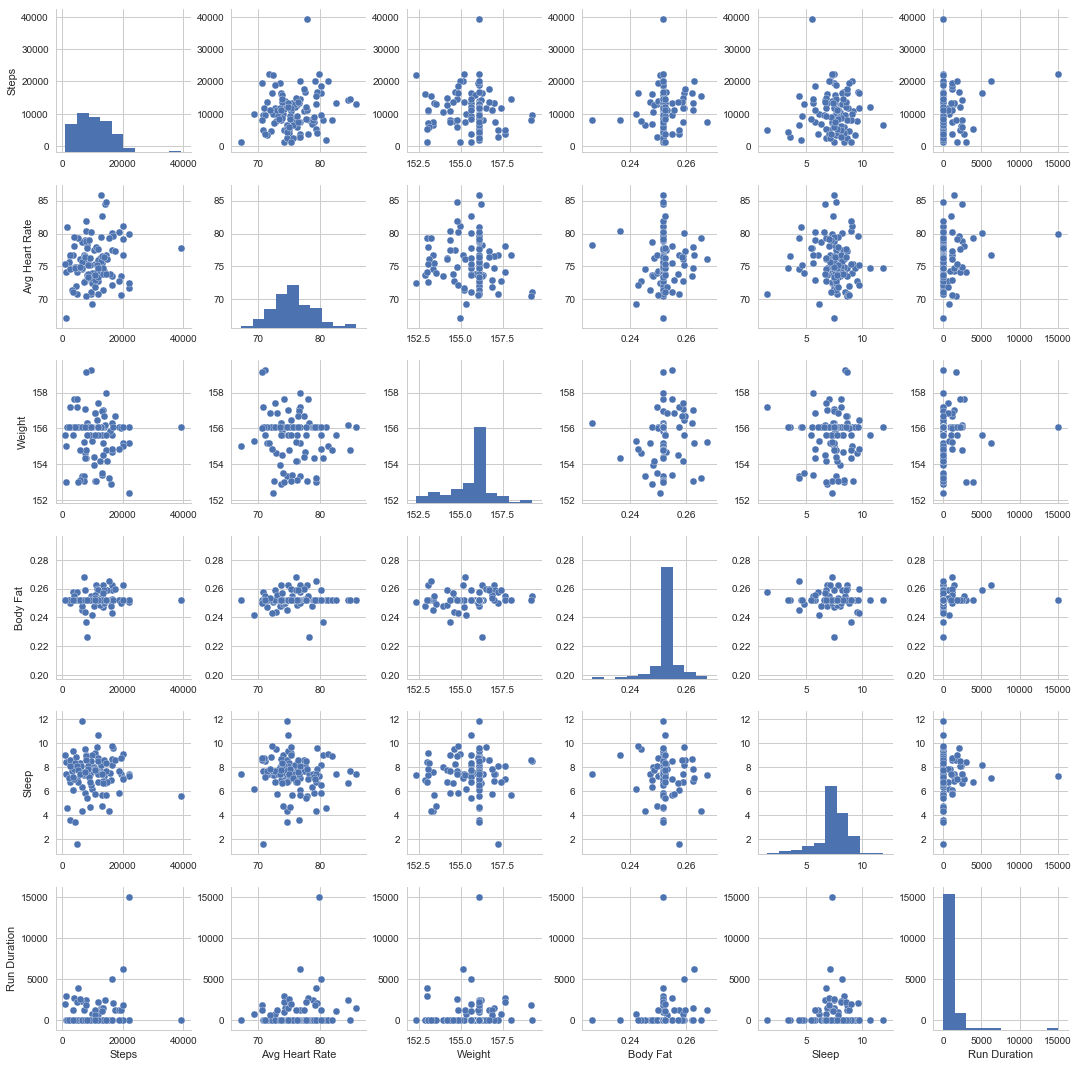

In [20]:
sns.set(style='whitegrid', context='notebook')
cols = ['Steps', 'Avg Heart Rate', 'Weight', 'Body Fat', 'Sleep', 'Run Duration']
sns.pairplot(df4[cols], size=2.5)
plt.show()

#### Correlation Matrix

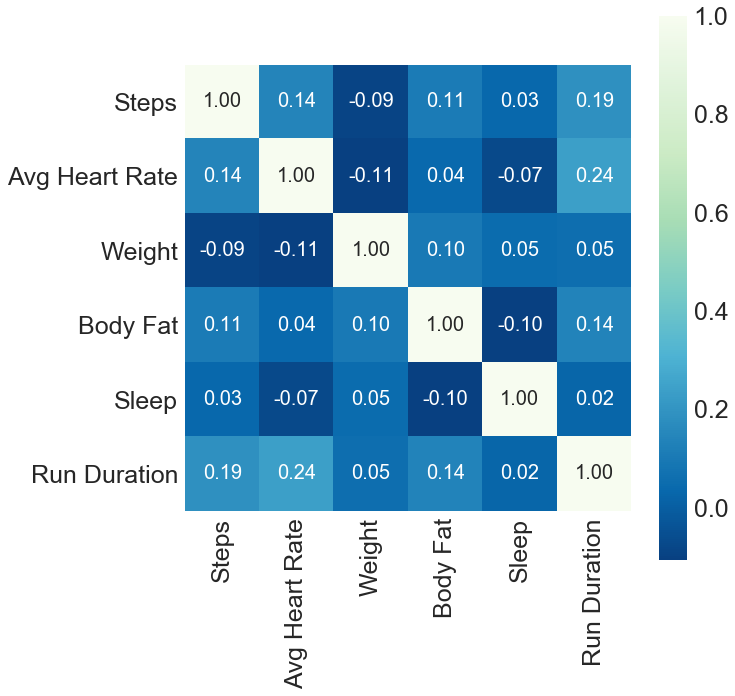

In [21]:
cm2 = np.corrcoef(df4[cols].values.T)
fig = sns.set(font_scale=2.5)
plt.subplots(figsize=(10,10))
hm2 = sns.heatmap(cm2,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 20},
    yticklabels=cols,
    xticklabels=cols,
    cmap='GnBu_r')
#plot_url = py.plot(hm)
plt.show()

#### Distributions

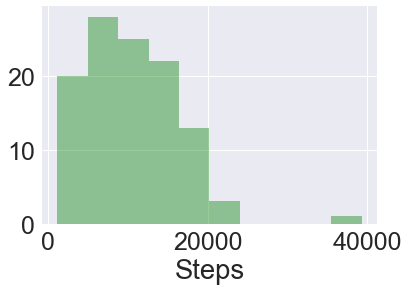

In [22]:
sns.distplot(df4['Steps'], bins=10, kde=False, label = 'steps', color='g')

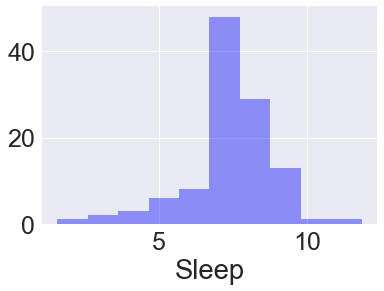

In [23]:
sns.distplot(df4['Sleep'], bins=10, kde=False, label = 'hrs', color='b')

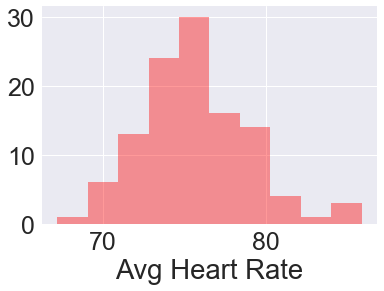

In [24]:
ax3 = sns.distplot(df4['Avg Heart Rate'], bins=10, kde=False, label = 'bpm', color='r')

In [25]:
pk.dump(df4, open('data_sample2.pkl','wb'))